In [5]:
import pandas as pd
import matplotlib as mpl


import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras import optimizers
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import time
import joblib
import pickle

scaler_filename = "scaler_data"
threshold_filename = "threshold_value"

In [6]:
# train =pd.read_csv("ME1.csv")
train =pd.read_csv("ME1_Merged.csv")
train.drop('time', axis=1, inplace=True)

test = pd.read_csv("Test_Alarms.csv")


In [7]:
train.describe()

,1011001,1011002,1011003,1011004,1011005,1011006,1011007,1011008,1011009,1011010,...,1011264,1011265,1011266,1011267,1011270,1011271,1011272,1011273,1011466,1011467
count,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,...,4335.0,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.000000,4335.0,4335.000000,4335.000000
mean,236.670250,238.561700,236.670250,236.906680,237.143118,236.906680,236.906680,236.670250,308.955872,236.433813,...,0.0,237.054446,51.651241,58.225923,486.775181,12190.997242,0.000154,60.0,35.243553,29.821467
std,66.600775,67.133041,66.600775,66.667310,66.733844,66.667310,66.667310,66.600775,92.404405,66.534242,...,0.0,66.708890,8.371194,7.663115,116.954556,3633.686571,0.000363,0.0,14.415400,12.197646
min,30.062742,30.303001,30.062742,30.092772,30.122807,30.092772,30.092772,30.062742,30.166208,30.032707,...,0.0,30.111546,20.862974,24.999979,0.000000,0.000000,0.000000,60.0,0.000000,0.000000
25%,266.592102,268.722687,266.592102,266.858429,267.124756,266.858429,266.858429,266.592102,348.369965,266.325775,...,0.0,267.024872,53.408051,60.408268,512.126038,13314.760740,0.000000,60.0,40.227795,34.038902
50%,266.592102,268.722687,266.592102,266.858429,267.124756,266.858429,266.858429,266.592102,348.369965,266.325775,...,0.0,267.024872,53.409683,60.408310,512.126038,13314.776370,0.000000,60.0,40.227795,34.038902
75%,266.592102,268.722687,266.592102,266.858429,267.124756,266.858429,266.858429,266.592102,348.369965,266.325775,...,0.0,267.024872,53.409683,60.408329,512.127472,13314.776370,0.000000,60.0,40.227795,34.038902
max,376.448853,379.457458,376.448853,376.824951,377.201019,376.824951,376.824951,376.448853,573.582458,376.072784,...,0.0,377.059998,70.205795,61.993626,779.069031,26614.322266,0.004018,60.0,107.548775,91.002808


In [8]:
test.describe()

,1011001,1011002,1011003,1011004,1011005,1011006,1011007,1011008,1011009,1011010,...,1011264,1011265,1011266,1011267,1011270,1011271,1011272,1011273,1011466,1011467
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3586.0,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.0,3586.000000,3586.000000
mean,341.405610,344.134089,341.405610,341.746647,342.087727,341.746647,341.746647,341.405610,462.711724,341.064529,...,0.0,341.959824,49.997727,58.735751,723.032824,14833.875535,12239.821650,60.0,69.764416,59.031430
std,139.696647,140.813084,139.696647,139.836191,139.975755,139.836191,139.836191,139.696647,198.272090,139.557084,...,0.0,139.923420,9.602566,8.682534,237.791168,5402.894433,8138.119210,0.0,36.876219,31.202955
min,30.062742,30.303001,30.062742,30.092772,30.122807,30.092772,30.092772,30.062742,30.166208,30.032707,...,0.0,30.111546,20.862974,24.999979,0.000000,0.000000,0.000000,60.0,0.000000,0.000000
25%,184.211227,185.683464,184.211227,184.395248,184.579288,184.395248,184.395248,184.211227,232.284042,184.027191,...,0.0,184.510269,49.977161,60.150809,516.624863,10533.418945,0.000453,60.0,21.491820,18.185386
50%,432.968353,436.428589,432.968353,433.400848,433.833405,433.400848,433.400848,432.968353,593.629822,432.535797,...,0.0,433.671204,49.979851,61.859982,861.041077,17869.148438,17869.144531,60.0,94.386230,79.865273
75%,432.968353,436.428589,432.968353,433.400848,433.833405,433.400848,433.400848,432.968353,593.629822,432.535797,...,0.0,433.671204,52.259802,61.860077,861.041138,17869.181641,17869.177734,60.0,94.386383,79.865402
max,433.915649,437.383453,433.915649,434.349091,434.782593,434.349091,434.349091,433.915649,620.313110,433.482147,...,0.0,434.620056,71.566887,62.425011,902.308411,26614.322266,20118.355469,60.0,126.842194,107.328011


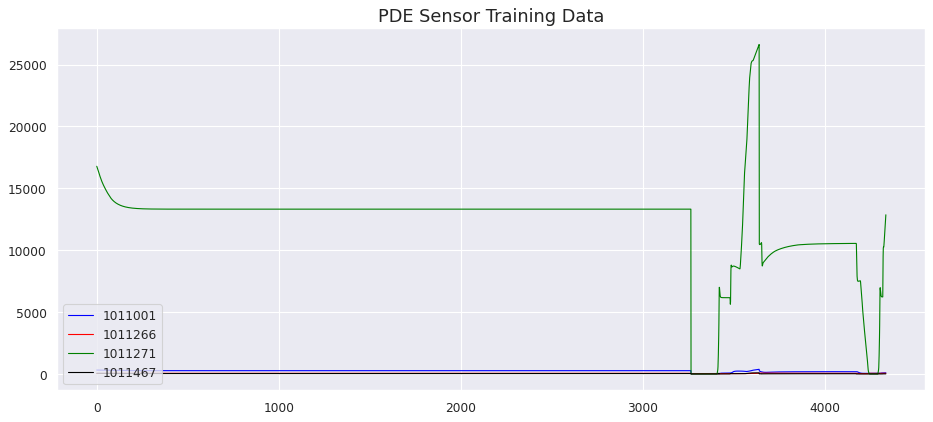

In [9]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['1011001'], label='1011001', color='blue', animated = True, linewidth=1)
ax.plot(train['1011266'], label='1011266', color='red', animated = True, linewidth=1)
ax.plot(train['1011271'], label='1011271', color='green', animated = True, linewidth=1)
ax.plot(train['1011467'], label='1011467', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('PDE Sensor Training Data', fontsize=16)
plt.show()

In [10]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [11]:
X_train.shape

(4335, 66)

In [12]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4335, 1, 66)
Testing data shape: (3586, 1, 66)


In [13]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [14]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 66)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             5312      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 66)             1122  

In [15]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/100
412/412 [==============================] - 18s 14ms/step - loss: 0.4452 - val_loss: 0.3010
Epoch 2/100
412/412 [==============================] - 3s 8ms/step - loss: 0.1840 - val_loss: 0.3052
Epoch 3/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0825 - val_loss: 0.2979
Epoch 4/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0792 - val_loss: 0.2952
Epoch 5/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0778 - val_loss: 0.2938
Epoch 6/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0762 - val_loss: 0.2933
Epoch 7/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0804 - val_loss: 0.2938
Epoch 8/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0779 - val_loss: 0.2934
Epoch 9/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0756 - val_loss: 0.2931
Epoch 10/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0783 - val_

412/412 [==============================] - 3s 7ms/step - loss: 0.0787 - val_loss: 0.2933
Epoch 82/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0755 - val_loss: 0.2933
Epoch 83/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0769 - val_loss: 0.2928
Epoch 84/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0796 - val_loss: 0.2932
Epoch 85/100
412/412 [==============================] - 4s 9ms/step - loss: 0.0771 - val_loss: 0.2933
Epoch 86/100
412/412 [==============================] - 3s 8ms/step - loss: 0.0771 - val_loss: 0.2937
Epoch 87/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0771 - val_loss: 0.2932
Epoch 88/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0806 - val_loss: 0.2929
Epoch 89/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0758 - val_loss: 0.2938
Epoch 90/100
412/412 [==============================] - 3s 7ms/step - loss: 0.0785 - val_loss: 

In [16]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


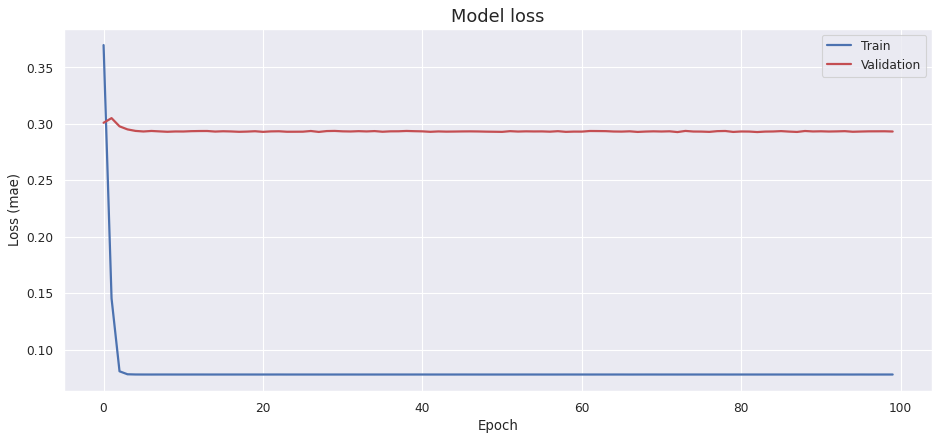

In [17]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

# Distribution of Loss Function¶
By plotting the distribution of the calculated loss in the training set, one can use this to identify a suitable threshold value for identifying an anomaly. In doing this, one can make sure that this threshold is set above the “noise level” and that any flagged anomalies should be statistically significant above the background noise.

/home/sudarsan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

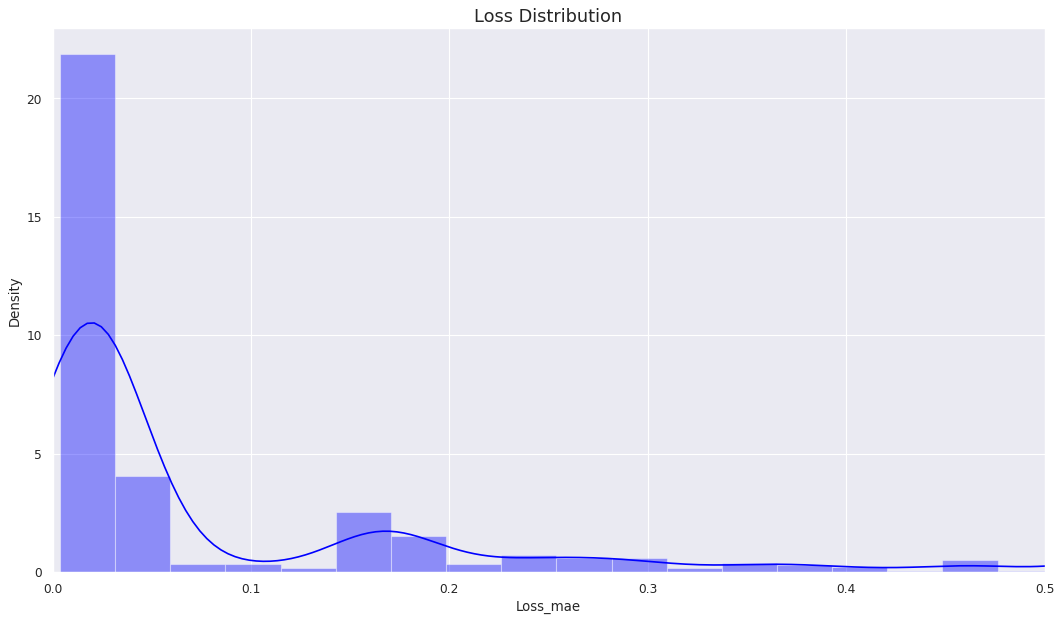

In [18]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [19]:
#Threshold = 0.25

train_loss = tf.keras.losses.mae(X_pred,Xtrain)

Threshold = np.mean(train_loss) + 6*np.std(train_loss) # 2dl business case
print(Threshold)


data = {}

data['threshold'] = Threshold

with open("threshold_value", 'wb') as f:
    pickle.dump(data, f)
 

0.8888400946026287


In [20]:
# calculate the loss on the train set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
scored['Threshold'] = Threshold
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.195740,0.88884,False
1,0.209413,0.88884,False
2,0.195908,0.88884,False
3,0.191342,0.88884,False
4,0.189840,0.88884,False


In [21]:
scored.to_csv('scored.csv')

<AxesSubplot:>

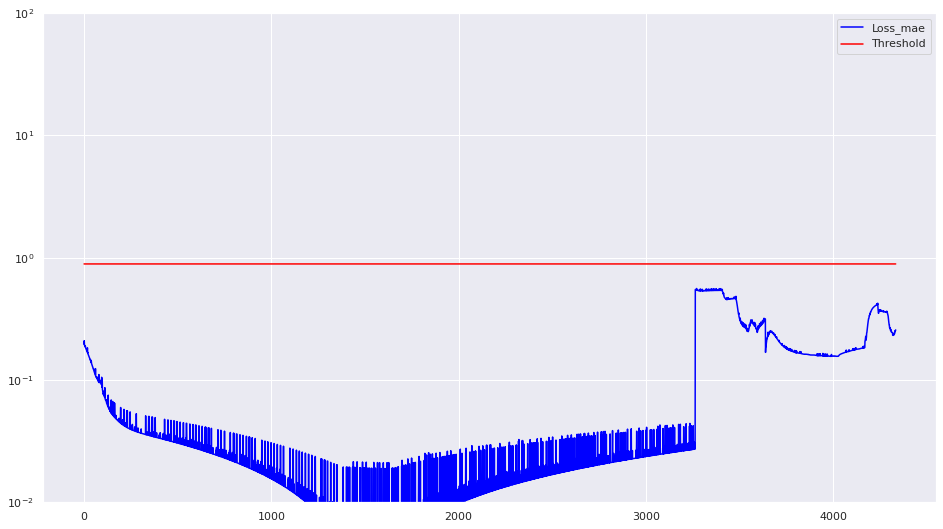

In [22]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])

In [23]:
# calculate the loss on the test set
X_pred_test = model.predict(X_test)
X_pred_test = X_pred_test.reshape(X_pred_test.shape[0], X_pred_test.shape[2])
X_pred_test = pd.DataFrame(X_pred_test, columns=test.columns)
X_pred_test.index = test.index

scored_test = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored_test['Loss_mae'] = np.mean(np.abs(X_pred_test-Xtest), axis = 1)
scored_test['Threshold'] = Threshold
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']
scored_test.head()

,Loss_mae,Threshold,Anomaly
0,0.546545,0.88884,False
1,0.549839,0.88884,False
2,0.545235,0.88884,False
3,0.544774,0.88884,False
4,0.544016,0.88884,False


/home/sudarsan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

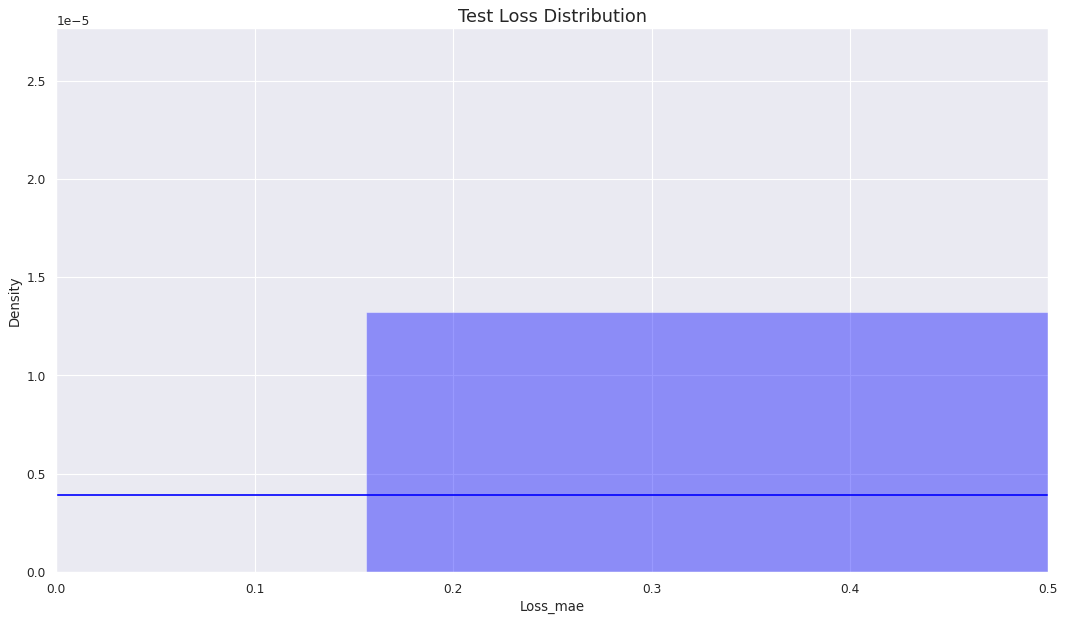

In [24]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Test Loss Distribution', fontsize=16)
sns.distplot(scored_test['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [25]:
scored_test.to_csv('scored_test.csv')

<AxesSubplot:>

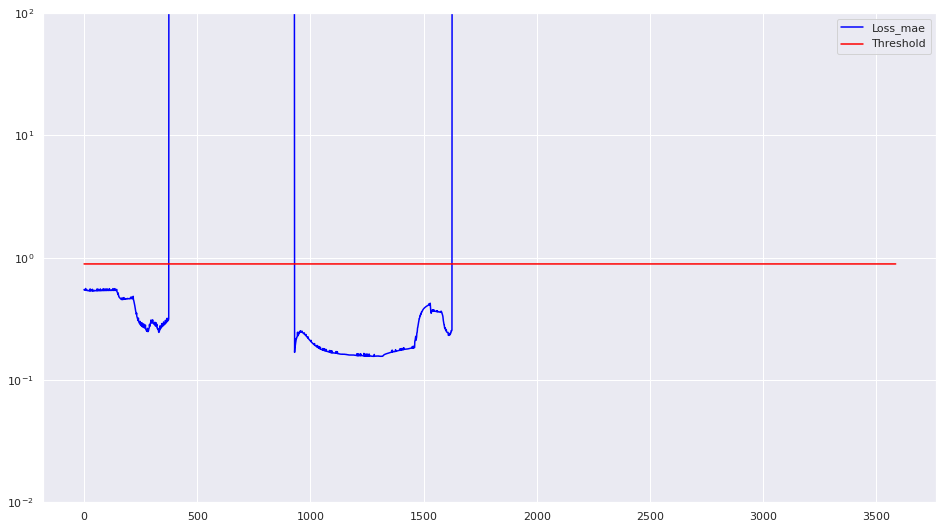

In [26]:
# plot bearing failure time plot
scored_test.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])

# Batch Inference

In [46]:
Inference = pd.read_csv("Test_Alarms.csv")

# Inference = pd.read_csv("ME1_Merged.csv")
# Inference.drop('time', axis=1, inplace=True)

Inference_test_scaled = scaler.transform(Inference)


# reshape inputs for LSTM [samples, timesteps, features]
Inference_test_scaled = Inference_test_scaled.reshape(Inference_test_scaled.shape[0], 1, Inference_test_scaled.shape[1])
Inference_predicted = model.predict(Inference_test_scaled)
Inference_predicted = Inference_predicted.reshape(Inference_predicted.shape[0],Inference_predicted.shape[2])
Inference_predicted = pd.DataFrame(Inference_predicted,columns=Inference.columns)
Inference_predicted.index = Inference.index


Inference_test_scaled = Inference_test_scaled.reshape(Inference_test_scaled.shape[0], Inference_test_scaled.shape[2])

loss_mae = np.mean(np.abs(Inference_predicted-Inference_test_scaled), axis = 1)



for i in range(0,len(loss_mae)):

    if loss_mae[i] < Threshold:
        print(i ,"Normal ")
    else:
        print(i, "Anomaly Detected")



0 Normal 
1 Normal 
2 Normal 
3 Normal 
4 Normal 
5 Normal 
6 Normal 
7 Normal 
8 Normal 
9 Normal 
10 Normal 
11 Normal 
12 Normal 
13 Normal 
14 Normal 
15 Normal 
16 Normal 
17 Normal 
18 Normal 
19 Normal 
20 Normal 
21 Normal 
22 Normal 
23 Normal 
24 Normal 
25 Normal 
26 Normal 
27 Normal 
28 Normal 
29 Normal 
30 Normal 
31 Normal 
32 Normal 
33 Normal 
34 Normal 
35 Normal 
36 Normal 
37 Normal 
38 Normal 
39 Normal 
40 Normal 
41 Normal 
42 Normal 
43 Normal 
44 Normal 
45 Normal 
46 Normal 
47 Normal 
48 Normal 
49 Normal 
50 Normal 
51 Normal 
52 Normal 
53 Normal 
54 Normal 
55 Normal 
56 Normal 
57 Normal 
58 Normal 
59 Normal 
60 Normal 
61 Normal 
62 Normal 
63 Normal 
64 Normal 
65 Normal 
66 Normal 
67 Normal 
68 Normal 
69 Normal 
70 Normal 
71 Normal 
72 Normal 
73 Normal 
74 Normal 
75 Normal 
76 Normal 
77 Normal 
78 Normal 
79 Normal 
80 Normal 
81 Normal 
82 Normal 
83 Normal 
84 Normal 
85 Normal 
86 Normal 
87 Normal 
88 Normal 
89 Normal 
90 Normal 
91 Normal

634 Anomaly Detected
635 Anomaly Detected
636 Anomaly Detected
637 Anomaly Detected
638 Anomaly Detected
639 Anomaly Detected
640 Anomaly Detected
641 Anomaly Detected
642 Anomaly Detected
643 Anomaly Detected
644 Anomaly Detected
645 Anomaly Detected
646 Anomaly Detected
647 Anomaly Detected
648 Anomaly Detected
649 Anomaly Detected
650 Anomaly Detected
651 Anomaly Detected
652 Anomaly Detected
653 Anomaly Detected
654 Anomaly Detected
655 Anomaly Detected
656 Anomaly Detected
657 Anomaly Detected
658 Anomaly Detected
659 Anomaly Detected
660 Anomaly Detected
661 Anomaly Detected
662 Anomaly Detected
663 Anomaly Detected
664 Anomaly Detected
665 Anomaly Detected
666 Anomaly Detected
667 Anomaly Detected
668 Anomaly Detected
669 Anomaly Detected
670 Anomaly Detected
671 Anomaly Detected
672 Anomaly Detected
673 Anomaly Detected
674 Anomaly Detected
675 Anomaly Detected
676 Anomaly Detected
677 Anomaly Detected
678 Anomaly Detected
679 Anomaly Detected
680 Anomaly Detected
681 Anomaly D

1207 Normal 
1208 Normal 
1209 Normal 
1210 Normal 
1211 Normal 
1212 Normal 
1213 Normal 
1214 Normal 
1215 Normal 
1216 Normal 
1217 Normal 
1218 Normal 
1219 Normal 
1220 Normal 
1221 Normal 
1222 Normal 
1223 Normal 
1224 Normal 
1225 Normal 
1226 Normal 
1227 Normal 
1228 Normal 
1229 Normal 
1230 Normal 
1231 Normal 
1232 Normal 
1233 Normal 
1234 Normal 
1235 Normal 
1236 Normal 
1237 Normal 
1238 Normal 
1239 Normal 
1240 Normal 
1241 Normal 
1242 Normal 
1243 Normal 
1244 Normal 
1245 Normal 
1246 Normal 
1247 Normal 
1248 Normal 
1249 Normal 
1250 Normal 
1251 Normal 
1252 Normal 
1253 Normal 
1254 Normal 
1255 Normal 
1256 Normal 
1257 Normal 
1258 Normal 
1259 Normal 
1260 Normal 
1261 Normal 
1262 Normal 
1263 Normal 
1264 Normal 
1265 Normal 
1266 Normal 
1267 Normal 
1268 Normal 
1269 Normal 
1270 Normal 
1271 Normal 
1272 Normal 
1273 Normal 
1274 Normal 
1275 Normal 
1276 Normal 
1277 Normal 
1278 Normal 
1279 Normal 
1280 Normal 
1281 Normal 
1282 Normal 
1283 Normal 

2022 Anomaly Detected
2023 Anomaly Detected
2024 Anomaly Detected
2025 Anomaly Detected
2026 Anomaly Detected
2027 Anomaly Detected
2028 Anomaly Detected
2029 Anomaly Detected
2030 Anomaly Detected
2031 Anomaly Detected
2032 Anomaly Detected
2033 Anomaly Detected
2034 Anomaly Detected
2035 Anomaly Detected
2036 Anomaly Detected
2037 Anomaly Detected
2038 Anomaly Detected
2039 Anomaly Detected
2040 Anomaly Detected
2041 Anomaly Detected
2042 Anomaly Detected
2043 Anomaly Detected
2044 Anomaly Detected
2045 Anomaly Detected
2046 Anomaly Detected
2047 Anomaly Detected
2048 Anomaly Detected
2049 Anomaly Detected
2050 Anomaly Detected
2051 Anomaly Detected
2052 Anomaly Detected
2053 Anomaly Detected
2054 Anomaly Detected
2055 Anomaly Detected
2056 Anomaly Detected
2057 Anomaly Detected
2058 Anomaly Detected
2059 Anomaly Detected
2060 Anomaly Detected
2061 Anomaly Detected
2062 Anomaly Detected
2063 Anomaly Detected
2064 Anomaly Detected
2065 Anomaly Detected
2066 Anomaly Detected
2067 Anoma

2524 Anomaly Detected
2525 Anomaly Detected
2526 Anomaly Detected
2527 Anomaly Detected
2528 Anomaly Detected
2529 Anomaly Detected
2530 Anomaly Detected
2531 Anomaly Detected
2532 Anomaly Detected
2533 Anomaly Detected
2534 Anomaly Detected
2535 Anomaly Detected
2536 Anomaly Detected
2537 Anomaly Detected
2538 Anomaly Detected
2539 Anomaly Detected
2540 Anomaly Detected
2541 Anomaly Detected
2542 Anomaly Detected
2543 Anomaly Detected
2544 Anomaly Detected
2545 Anomaly Detected
2546 Anomaly Detected
2547 Anomaly Detected
2548 Anomaly Detected
2549 Anomaly Detected
2550 Anomaly Detected
2551 Anomaly Detected
2552 Anomaly Detected
2553 Anomaly Detected
2554 Anomaly Detected
2555 Anomaly Detected
2556 Anomaly Detected
2557 Anomaly Detected
2558 Anomaly Detected
2559 Anomaly Detected
2560 Anomaly Detected
2561 Anomaly Detected
2562 Anomaly Detected
2563 Anomaly Detected
2564 Anomaly Detected
2565 Anomaly Detected
2566 Anomaly Detected
2567 Anomaly Detected
2568 Anomaly Detected
2569 Anoma

3271 Anomaly Detected
3272 Anomaly Detected
3273 Anomaly Detected
3274 Anomaly Detected
3275 Anomaly Detected
3276 Anomaly Detected
3277 Anomaly Detected
3278 Anomaly Detected
3279 Anomaly Detected
3280 Anomaly Detected
3281 Anomaly Detected
3282 Anomaly Detected
3283 Anomaly Detected
3284 Anomaly Detected
3285 Anomaly Detected
3286 Anomaly Detected
3287 Anomaly Detected
3288 Anomaly Detected
3289 Anomaly Detected
3290 Anomaly Detected
3291 Anomaly Detected
3292 Anomaly Detected
3293 Anomaly Detected
3294 Anomaly Detected
3295 Anomaly Detected
3296 Anomaly Detected
3297 Anomaly Detected
3298 Anomaly Detected
3299 Anomaly Detected
3300 Anomaly Detected
3301 Anomaly Detected
3302 Anomaly Detected
3303 Anomaly Detected
3304 Anomaly Detected
3305 Anomaly Detected
3306 Anomaly Detected
3307 Anomaly Detected
3308 Anomaly Detected
3309 Anomaly Detected
3310 Anomaly Detected
3311 Anomaly Detected
3312 Anomaly Detected
3313 Anomaly Detected
3314 Anomaly Detected
3315 Anomaly Detected
3316 Anoma

# Live Data Inferencce through REST API

In [28]:
# loaded_model = keras.models.load_model("my_model")
# loaded_scaler = joblib.load(scaler_filename)

# Inference = pd.read_csv("Test_Alarms.csv")

# # Inference = pd.read_csv("ME1_Merged.csv")
# # Inference.drop('time', axis=1, inplace=True)

# # Inference = Inference[0:1]

# Inference_test_scaled = loaded_scaler.transform(Inference)


# # # reshape inputs for LSTM [samples, timesteps, features]
# Inference_test_scaled = Inference_test_scaled.reshape(Inference_test_scaled.shape[0], 1, Inference_test_scaled.shape[1])
# Inference_predicted = loaded_model.predict(Inference_test_scaled)
# Inference_predicted = Inference_predicted.reshape(Inference_predicted.shape[0],Inference_predicted.shape[2])



# Inference_test_scaled = Inference_test_scaled.reshape(Inference_test_scaled.shape[0], Inference_test_scaled.shape[2])

# loss_mae = np.mean(np.abs(Inference_predicted-Inference_test_scaled), axis = 1)

# with open(threshold_filename, 'rb') as f:
#         data = pickle.load(f)
# Threshold = data['threshold']

# for i in range(0,len(Inference)):
#     if loss_mae[i] < Threshold:
#         print(i ,"Normal ")
#     else:
#         print(i, "Anomaly Detected")


In [29]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# def generate_datasets_for_training(data, window_size,scale=True, scaler_type=StandardScaler):
#     _l = len(data) 
#     data = scaler_type().fit_transform(data)
#     Xs = []
#     Ys = []
#     for i in range(0, (_l - window_size)):
#         # because this is an autoencoder - our Ys are the same as our Xs. 
#         Xs.append(data[i:i+window_size])
#         Ys.append(data[i:i+window_size])
#     tr_x, tr_y, ts_x, ts_y = [np.array(x) for x in train_test_split(Xs, Ys)]
#     assert tr_x.shape[2] == ts_x.shape[2] == (data.shape[1] if (type(data) == np.ndarray) else len(data))
#     return  (tr_x.shape[2], tr_x, tr_y, ts_x, ts_y)

In [30]:
# feats, X, Y, XX, YY = generate_datasets_for_training(df, window_length)

In [31]:
# feats, X.shape, Y.shape, XX.shape, YY.shape

In [32]:

# from keras import metrics
# import keras
# import tensorflow as tf
# import os

# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=1e-2, patience=5, verbose=1, mode='auto',
#     baseline=None, restore_best_weights=True)

# feats, X, Y, XX, YY = generate_datasets_for_training(df, window_length)

# lstm_autoencoder = keras.Sequential()
# lstm_autoencoder.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, window_length, feats), return_sequences=True, name='encoder_1'))
# # lstm_autoencoder.add(Dropout(0.2))

# # lstm_autoencoder.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
# # # lstm_autoencoder.add(Dropout(0.2))

# # lstm_autoencoder.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
# # lstm_autoencoder.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))

# # lstm_autoencoder.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
# # # lstm_autoencoder.add(Dropout(0.2))

# # lstm_autoencoder.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
# # # lstm_autoencoder.add(Dropout(0.2))

# lstm_autoencoder.add(keras.layers.LSTM(8, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
# lstm_autoencoder.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))

# lstm_autoencoder.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
# lstm_autoencoder.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))
# lstm_autoencoder.compile(loss="mse",optimizer='adam')
# # lstm_autoencoder.build()
# print(lstm_autoencoder.summary())

# # model.fit(x=X, y=Y, validation_data=(XX, YY), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop],verbose=1)
# # model.fit(x=X, y=XX, validation_data=(Y, YY), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop],verbose=1)

In [33]:
# adam = optimizers.Adam(lr)
# lstm_autoencoder.compile(loss='mse', optimizer=adam)

# cp = ModelCheckpoint(filepath="lstm_autoencoder_classifier.h5",
#                                save_best_only=True,
#                                verbose=0)

# tb = TensorBoard(log_dir='./logs',
#                 histogram_freq=0,
#                 write_graph=True,
#                 write_images=True)

# lstm_autoencoder_history = lstm_autoencoder.fit(X, X, 
#                                                 epochs=epochs, 
#                                                 batch_size=batch, 
#                                                 validation_data=(Y, Y),
#                                                 verbose=2).history

In [34]:
# plt.plot(lstm_autoencoder_history['loss'], linewidth=2, label='Train')
# plt.plot(lstm_autoencoder_history['val_loss'], linewidth=2, label='Valid')
# plt.legend(loc='upper right')
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()

In [35]:
# def flatten(X):
#     '''
#     Flatten a 3D array.
    
#     Input
#     X            A 3D array for lstm, where the array is sample x timesteps x features.
    
#     Output
#     flattened_X  A 2D array, sample x features.
#     '''
#     flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
#     for i in range(X.shape[0]):
#         flattened_X[i] = X[i, (X.shape[1]-1), :]
#     return(flattened_X)

In [36]:
# resconstructions = lstm_autoencoder.predict(X)
# # score1 = np.sqrt(metrics.mean_squared_error(resconstructions,X))
# # # print(score1)

# train_loss = tf.keras.losses.mae(resconstructions,X)
# # print(train_loss)


# # plt.hist(train_loss,bins=50)

In [37]:
# np.mean(train_loss)

In [38]:
# np.std(train_loss)

In [39]:
# threshold = np.mean(train_loss) + 3*np.std(train_loss)
# threshold

# Inference

In [40]:
# normal_data = pd.read_csv("ME1.csv")
# normal_data.drop('time', axis=1, inplace=True)
# abnormal_data = pd.read_csv("Test_Alarms.csv")

In [41]:
# normal_data.shape, abnormal_data.shape

In [42]:
# inference_data = abnormal_data

In [43]:
# feats_, X_, Y_, XX_, YY_ = generate_datasets_for_training(inference_data, window_length)
# test_data = X_


In [44]:
# inference_predictions_resconstruction = lstm_autoencoder.predict(test_data)

# inference_loss = tf.keras.losses.mae(inference_predictions_resconstruction,test_data)



# for i in range(0,len(inference_loss)):

#     inference_res = tf.math.less(inference_loss[0][0],threshold)

#     if inference_res:
#         print(i ,"Normal ")
#     else:
#         print(i, "Anomaly Detected")